# **Import Images**

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

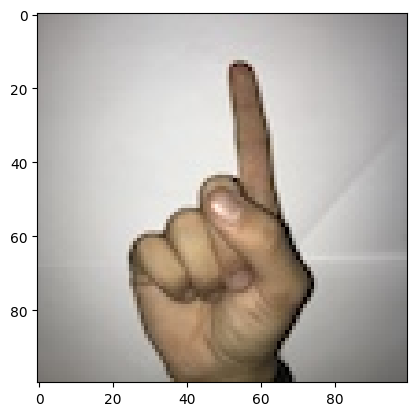

In [2]:
# Show RGB Image
from matplotlib import image
image = image.imread('example_1.jpeg')
plt.imshow(image)

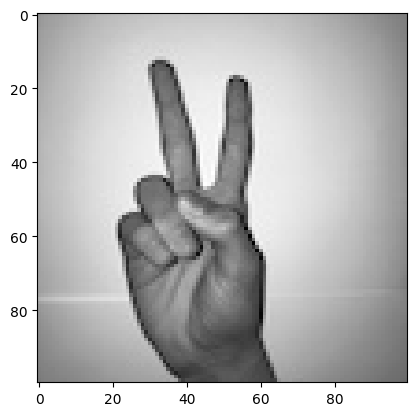

In [3]:
# Show Gray Image
from PIL import Image
img = Image.open('example_2.jpeg')
gray_img = img.convert("L")
plt.imshow(gray_img, cmap='gray')

In [4]:
from imutils import paths
import cv2

# get paths for all data
pth = list(paths.list_images('Dataset'))
#pth

In [5]:
len(pth)

2062

In [6]:
import os

pths = []
for root, dirs, files in os.walk('Dataset', topdown=False):
    for name in dirs:
        pths.append(os.path.join(root, name))

# path for each type of data
pths[0]

'Dataset\\0'

In [7]:
#classification(type) of the data
typ = [0,1,2,3,4,5,6,7,8,9]

In [8]:
for i in range(10):
    print(pths[i], "  =>  ", typ[i])

Dataset\0   =>   0
Dataset\1   =>   1
Dataset\2   =>   2
Dataset\3   =>   3
Dataset\4   =>   4
Dataset\5   =>   5
Dataset\6   =>   6
Dataset\7   =>   7
Dataset\8   =>   8
Dataset\9   =>   9


In [9]:
from imutils import paths

img = []
for i in range(10):
    p = pths[i]
    img.append(list(paths.list_images(p)))
    
img[0][0]

'Dataset\\0\\IMG_1118.JPG'

#  GrayScale Preprocessing

In [10]:
# GrayScale Images
from skimage import color

images = []
classes = []
for i in range(len(pths)):
    pth = pths[i]
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth,j),0)
        #imgGray = color.rgb2gray(img)
        img = cv2.resize(img, (100, 100))
        img = img/255
        classes.append(i)
        images.append(img)                  

In [11]:
from sklearn.model_selection import train_test_split

images = np.array(images)
classes = np.array(classes)
x_train, x_test, y_train, y_test = train_test_split(images, classes, test_size = 0.2, random_state = 1)

In [12]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1649
413
1649
413


In [13]:
x_train.shape

(1649, 100, 100)

# Model 1 GrayScale Images 

### With 2000 neurons, Without KFold Cross Validation

In [14]:
# Model 1 GrayScale
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = tf.keras.models.Sequential() 
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(2000, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2)) 
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

kf = KFold(n_splits=3, random_state=1, shuffle=True)

model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
52/52 [==============================] - 16s 277ms/step - loss: 14.3179 - accuracy: 0.1025
Epoch 2/10
52/52 [==============================] - 13s 243ms/step - loss: 2.2125 - accuracy: 0.2062
Epoch 3/10
52/52 [==============================] - 13s 244ms/step - loss: 2.1230 - accuracy: 0.2341
Epoch 4/10
52/52 [==============================] - 13s 241ms/step - loss: 2.0395 - accuracy: 0.2838
Epoch 5/10
52/52 [==============================] - 13s 241ms/step - loss: 2.0126 - accuracy: 0.2929
Epoch 6/10
52/52 [==============================] - 13s 248ms/step - loss: 1.8565 - accuracy: 0.3639
Epoch 7/10
52/52 [==============================] - 13s 241ms/step - loss: 1.7946 - accuracy: 0.3784
Epoch 8/10
52/52 [==============================] - 13s 254ms/step - loss: 1.7764 - accuracy: 0.3760
Epoch 9/10
52/52 [==============================] - 14s 278ms/step - loss: 1.6745 - accuracy: 0.4124
Epoch 10/10
52/52 [==============================] - 14s 274ms/step - loss: 1.5912 - accur

In [15]:
model.predict(x_test)

13/13 [==============================] - 1s 36ms/step


array([[8.1561789e-02, 5.6921750e-01, 1.1907628e-01, ..., 4.2280316e-02,
        5.6567858e-03, 3.2300474e-03],
       [8.9076316e-01, 9.3232171e-04, 2.6782569e-03, ..., 9.7929430e-04,
        8.1916444e-04, 8.2137864e-03],
       [6.1786282e-03, 5.0265056e-01, 1.7569318e-01, ..., 1.2608676e-01,
        6.9535449e-02, 4.7897105e-03],
       ...,
       [5.8098502e-02, 4.1071348e-02, 8.6246289e-02, ..., 6.0133036e-02,
        1.6246983e-01, 1.9286199e-01],
       [3.1415987e-01, 3.0466665e-02, 8.9828491e-02, ..., 6.3860394e-02,
        5.0370201e-02, 5.5491187e-02],
       [5.9112683e-02, 4.7429979e-02, 1.8885884e-01, ..., 8.3102748e-02,
        1.3139558e-01, 4.9903922e-02]], dtype=float32)

In [16]:
loss, acc = model.evaluate(x_test, y_test)
print("Loss value = ", loss)
print("The accuracy = ", acc*100, "%")

13/13 [==============================] - 1s 35ms/step - loss: 1.4646 - accuracy: 0.5230
Loss value =  1.4646354913711548
The accuracy =  52.30024456977844 %


# Model 1 GrayScale Images 

### With 2000 neurons, With KFold Cross Validation

In [17]:
from sklearn.metrics import accuracy_score

acc_score = []
 
for train_index , test_index in kf.split(x_train):
    X_train , X_test = x_train[train_index],x_train[test_index]
    Y_train , Y_test = y_train[train_index] , y_train[test_index]
     
    model.fit(X_train, Y_train, epochs = 10)
    pred_values = model.predict(X_test).argmax(axis=1)
     
    acc = accuracy_score(pred_values , Y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/3
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

Epoch 1/10
35/35 [==============================] - 11s 307ms/step - loss: 1.4882 - accuracy: 0.4713
Epoch 2/10
35/35 [==============================] - 10s 294ms/step - loss: 1.5711 - accuracy: 0.4295
Epoch 3/10
35/35 [==============================] - 9s 262ms/step - loss: 1.4611 - accuracy: 0.4977
Epoch 4/10
35/35 [==============================] - 8s 243ms/step - loss: 1.4500 - accuracy: 0.4823
Epoch 5/10
35/35 [==============================] - 8s 238ms/step - loss: 1.4415 - accuracy: 0.4823
Epoch 6/10
35/35 [==============================] - 8s 235ms/step - loss: 1.4273 - accuracy: 0.4995
Epoch 7/10
35/35 [==============================] - 8s 235ms/step - loss: 1.4588 - accuracy: 0.4750
Epoch 8/10
35/35 [==============================] - 8s 238ms/step - loss: 1.4459 - accuracy: 0.4750
Epoch 9/10
35/35 [==============================] - 8s 237ms/step - loss: 1.3841 - accuracy: 0.4977
Epoch 10/10
18/18 [==============================] - 1s 29ms/step
Epoch 1/10
35/35 [==============

In [18]:
model.predict(x_test)

13/13 [==============================] - 1s 61ms/step


array([[8.39159402e-05, 4.82280463e-01, 3.13179046e-01, ...,
        1.20299507e-03, 9.18191563e-06, 2.86920113e-06],
       [9.71005619e-01, 2.87427101e-04, 1.51153852e-03, ...,
        3.06496077e-04, 7.69603124e-04, 2.12776125e-03],
       [2.27292112e-05, 7.32474685e-01, 2.38192275e-01, ...,
        1.75009184e-02, 2.12645216e-04, 9.22453978e-07],
       ...,
       [3.08659244e-02, 2.20594485e-03, 4.23922502e-02, ...,
        7.22633526e-02, 1.02240704e-01, 2.70004887e-02],
       [2.31136814e-01, 6.29546959e-03, 8.47936571e-02, ...,
        3.60790454e-02, 3.59612815e-02, 2.32157409e-02],
       [3.30733843e-02, 2.01087981e-03, 1.04062624e-01, ...,
        2.59027611e-02, 5.28469980e-02, 1.83411706e-02]], dtype=float32)

In [19]:
loss, acc = model.evaluate(x_test, y_test)
print("Loss value = ", loss)
print("The accuracy = ", acc*100, "%")

13/13 [==============================] - 1s 38ms/step - loss: 1.0586 - accuracy: 0.6513
Loss value =  1.0585699081420898
The accuracy =  65.13317227363586 %


# Model 2 GrayScale Images 

### With 3 Hidden Layer and different neurons, Without KFold Cross Validation

In [20]:
# Model 2 GrayScale
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model2 = tf.keras.models.Sequential() 
model2.add(tf.keras.layers.Flatten()) 
model2.add(tf.keras.layers.Dense(2000, activation = tf.nn.relu))
model2.add(tf.keras.layers.Dense(1000, activation = tf.nn.relu))
model2.add(tf.keras.layers.Dense(1000, activation = tf.nn.relu))
model2.add(tf.keras.layers.Dropout(0.2)) 
model2.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

kf = KFold(n_splits=3, random_state=1, shuffle=True)

model2.fit(x_train, y_train, epochs = 10)

Epoch 1/10
52/52 [==============================] - 19s 339ms/step - loss: 5.2843 - accuracy: 0.0885
Epoch 2/10
52/52 [==============================] - 18s 338ms/step - loss: 2.3063 - accuracy: 0.1377
Epoch 3/10
52/52 [==============================] - 17s 331ms/step - loss: 2.0761 - accuracy: 0.2408
Epoch 4/10
52/52 [==============================] - 14s 277ms/step - loss: 1.7939 - accuracy: 0.3275
Epoch 5/10
52/52 [==============================] - 15s 280ms/step - loss: 1.5492 - accuracy: 0.4209
Epoch 6/10
52/52 [==============================] - 15s 281ms/step - loss: 1.5826 - accuracy: 0.4069
Epoch 7/10
52/52 [==============================] - 15s 286ms/step - loss: 1.4381 - accuracy: 0.4603
Epoch 8/10
52/52 [==============================] - 15s 296ms/step - loss: 1.3286 - accuracy: 0.5021
Epoch 9/10
52/52 [==============================] - 15s 280ms/step - loss: 1.1712 - accuracy: 0.5585
Epoch 10/10
52/52 [==============================] - 14s 278ms/step - loss: 1.1397 - accura

In [21]:
model2.predict(x_test)

13/13 [==============================] - 1s 40ms/step


array([[1.20523100e-05, 8.70558977e-01, 1.24430537e-01, ...,
        7.98774563e-05, 9.90908302e-06, 1.60043321e-08],
       [9.99993563e-01, 3.08124254e-06, 2.96282154e-09, ...,
        5.13581533e-09, 1.08713230e-07, 1.25410054e-06],
       [2.92244295e-06, 9.06496227e-01, 9.32249576e-02, ...,
        1.24366445e-04, 1.39046442e-05, 9.92788429e-09],
       ...,
       [1.01804085e-01, 7.61174690e-03, 5.39871305e-03, ...,
        3.35613005e-02, 9.85658616e-02, 4.88010608e-02],
       [8.55358958e-01, 6.88842870e-03, 2.31229537e-03, ...,
        4.72567137e-03, 6.60002325e-03, 5.76380873e-03],
       [5.61468452e-02, 1.87333878e-02, 4.07759212e-02, ...,
        5.85670397e-02, 3.96642350e-02, 1.35163646e-02]], dtype=float32)

In [22]:
loss, acc = model2.evaluate(x_test, y_test)
print("Loss value = ", loss)
print("The accuracy = ", acc*100, "%")

13/13 [==============================] - 1s 37ms/step - loss: 1.1439 - accuracy: 0.5811
Loss value =  1.1439379453659058
The accuracy =  58.11138153076172 %


# Model 2 GrayScale Images 

### With 3 Hidden Layer and different neurons, With KFold Cross Validation

In [23]:
from sklearn.metrics import accuracy_score

acc_score = []
 
for train_index , test_index in kf.split(x_train):
    X_train , X_test = x_train[train_index],x_train[test_index]
    Y_train , Y_test = y_train[train_index] , y_train[test_index]
     
    model2.fit(X_train, Y_train, epochs = 10)
    pred_values = model2.predict(X_test).argmax(axis=1)
     
    acc = accuracy_score(pred_values , Y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/3
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

Epoch 1/10
35/35 [==============================] - 10s 272ms/step - loss: 1.2781 - accuracy: 0.5223
Epoch 2/10
35/35 [==============================] - 9s 271ms/step - loss: 1.1205 - accuracy: 0.5860
Epoch 3/10
35/35 [==============================] - 10s 278ms/step - loss: 1.1576 - accuracy: 0.5514
Epoch 4/10
35/35 [==============================] - 10s 279ms/step - loss: 1.0238 - accuracy: 0.6233
Epoch 5/10
35/35 [==============================] - 10s 273ms/step - loss: 1.0151 - accuracy: 0.6297
Epoch 6/10
35/35 [==============================] - 10s 288ms/step - loss: 0.9584 - accuracy: 0.6324
Epoch 7/10
35/35 [==============================] - 12s 328ms/step - loss: 1.0307 - accuracy: 0.6442
Epoch 8/10
35/35 [==============================] - 11s 312ms/step - loss: 0.9772 - accuracy: 0.6278
Epoch 9/10
35/35 [==============================] - 11s 307ms/step - loss: 0.9066 - accuracy: 0.6515
Epoch 10/10
18/18 [==============================] - 1s 38ms/step
Epoch 1/10
35/35 [========

In [24]:
model2.predict(x_test)

13/13 [==============================] - 1s 37ms/step


array([[1.4037944e-04, 9.9968815e-01, 1.6806700e-04, ..., 3.2548851e-07,
        1.8335804e-08, 1.0992760e-10],
       [1.0000000e+00, 3.8313913e-10, 5.8514843e-18, ..., 7.1676496e-15,
        1.1297287e-10, 3.7970171e-10],
       [5.7538955e-06, 9.9799675e-01, 1.9934175e-03, ..., 2.9190237e-06,
        3.3847044e-07, 5.2898841e-10],
       ...,
       [1.0416370e-02, 4.9484900e-04, 2.0156074e-03, ..., 2.7436702e-02,
        1.0931154e-02, 6.8193494e-04],
       [9.6818906e-01, 7.8369328e-04, 1.2066394e-04, ..., 1.1152228e-03,
        3.0377586e-03, 1.0191643e-03],
       [4.2528561e-03, 1.0373478e-03, 2.1326981e-02, ..., 2.5252849e-02,
        2.0459604e-02, 2.2575012e-03]], dtype=float32)

In [25]:
loss, acc = model2.evaluate(x_test, y_test)
print("Loss value = ", loss)
print("The accuracy = ", acc*100, "%")

13/13 [==============================] - 0s 36ms/step - loss: 0.7281 - accuracy: 0.7409
Loss value =  0.7281262874603271
The accuracy =  74.09201264381409 %


# RGB Preprocessing

In [26]:
# RGB Images
from skimage import color

images_2 = []
classes_2 = []
for i in range(len(pths)):
    pth = pths[i]
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth,j), cv2.IMREAD_COLOR)
        img = cv2.resize(img, (100, 100))
        avg = np.array(img).mean()
        img = img - avg
        img = img/255
        classes_2.append(i)
        images_2.append(img) 

In [27]:
from sklearn.model_selection import train_test_split

images_2 = np.array(images_2)
classes_2 = np.array(classes_2)
x_train, x_test, y_train, y_test = train_test_split(images_2, classes_2, test_size = 0.2, random_state = 1)

In [28]:
x_train.shape

(1649, 100, 100, 3)

# Model 1 RGB Images 

### Without KFold Cross Validation

In [29]:
# CNN Model 1 RGB
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu" , input_shape = (100,100, 3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,
    tf.keras.layers.Flatten(), 
    
    tf.keras.layers.Dense(1200,activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1200,activation ="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation = "softmax") 
])

In [30]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [31]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [32]:
kf = KFold(n_splits=3, random_state=1, shuffle=True)

model3.fit(x_train, y_train, epochs = 10)

Epoch 1/10
52/52 [==============================] - 36s 663ms/step - loss: 1.3762 - accuracy: 0.5082
Epoch 2/10
52/52 [==============================] - 34s 647ms/step - loss: 0.4423 - accuracy: 0.8605
Epoch 3/10
52/52 [==============================] - 42s 813ms/step - loss: 0.1900 - accuracy: 0.9448
Epoch 4/10
52/52 [==============================] - 39s 748ms/step - loss: 0.1228 - accuracy: 0.9630
Epoch 5/10
52/52 [==============================] - 34s 656ms/step - loss: 0.0796 - accuracy: 0.9757
Epoch 6/10
52/52 [==============================] - 31s 604ms/step - loss: 0.0779 - accuracy: 0.9727
Epoch 7/10
52/52 [==============================] - 35s 675ms/step - loss: 0.1539 - accuracy: 0.9539
Epoch 8/10
52/52 [==============================] - 31s 603ms/step - loss: 0.0541 - accuracy: 0.9836
Epoch 9/10
52/52 [==============================] - 38s 730ms/step - loss: 0.0534 - accuracy: 0.9848
Epoch 10/10
52/52 [==============================] - 40s 774ms/step - loss: 0.0242 - accura

In [33]:
model3.predict(x_test)

13/13 [==============================] - 2s 152ms/step


array([[5.8467959e-19, 1.0000000e+00, 1.8660615e-09, ..., 9.8166404e-18,
        1.3471113e-22, 2.0241896e-23],
       [1.0000000e+00, 6.5820752e-22, 1.1938220e-27, ..., 2.8681244e-21,
        2.4365518e-21, 4.2532588e-22],
       [4.0088475e-23, 1.0000000e+00, 4.0439928e-14, ..., 1.3108508e-21,
        1.6324814e-22, 2.5102579e-26],
       ...,
       [7.9482616e-09, 2.2739485e-15, 2.3145231e-13, ..., 1.6138506e-04,
        5.5616677e-08, 6.3285688e-10],
       [9.7023755e-01, 3.5335097e-06, 7.8047054e-07, ..., 2.7900780e-04,
        2.6493936e-04, 7.7376282e-03],
       [1.9370235e-08, 1.2540574e-11, 2.6337214e-06, ..., 1.1263024e-06,
        9.4286916e-09, 1.7842108e-08]], dtype=float32)

In [34]:
loss, acc = model3.evaluate(x_test, y_test)
print("Loss value = ", loss)
print("The accuracy = ", acc*100, "%")

13/13 [==============================] - 3s 188ms/step - loss: 0.4585 - accuracy: 0.8959
Loss value =  0.45849937200546265
The accuracy =  89.58837985992432 %


# Model 1 RGB Images

#### With KFold Cross Validation

In [35]:
from sklearn.metrics import accuracy_score

acc_score = []
 
for train_index , test_index in kf.split(x_train):
    X_train , X_test = x_train[train_index],x_train[test_index]
    Y_train , Y_test = y_train[train_index] , y_train[test_index]
     
    model3.fit(X_train, Y_train, epochs = 10)
    pred_values = model3.predict(X_test).argmax(axis=1)
    
    rounded_labels = np.argmax(Y_test, axis=1)
     
    acc = accuracy_score(pred_values , rounded_labels)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/3
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

Epoch 1/10
35/35 [==============================] - 27s 762ms/step - loss: 0.0066 - accuracy: 0.9982
Epoch 2/10
35/35 [==============================] - 27s 775ms/step - loss: 0.0308 - accuracy: 0.9955
Epoch 3/10
35/35 [==============================] - 25s 712ms/step - loss: 0.0286 - accuracy: 0.9927
Epoch 4/10
35/35 [==============================] - 22s 636ms/step - loss: 0.0104 - accuracy: 0.9945
Epoch 5/10
35/35 [==============================] - 23s 650ms/step - loss: 0.0216 - accuracy: 0.9945
Epoch 6/10
35/35 [==============================] - 22s 622ms/step - loss: 0.0046 - accuracy: 0.9982
Epoch 7/10
35/35 [==============================] - 23s 660ms/step - loss: 0.0028 - accuracy: 0.9991
Epoch 8/10
35/35 [==============================] - 25s 715ms/step - loss: 0.0167 - accuracy: 0.9945
Epoch 9/10
35/35 [==============================] - 22s 630ms/step - loss: 0.0396 - accuracy: 0.9873
Epoch 10/10
18/18 [==============================] - 3s 139ms/step
Epoch 1/10
35/35 [======

In [36]:
model3.predict(x_test)

13/13 [==============================] - 2s 136ms/step


array([[3.4446068e-28, 1.0000000e+00, 2.5771430e-16, ..., 2.6123204e-31,
        6.0650230e-33, 1.1383576e-35],
       [1.0000000e+00, 1.8384567e-27, 0.0000000e+00, ..., 1.1824550e-34,
        1.4988287e-34, 0.0000000e+00],
       [7.3964768e-29, 1.0000000e+00, 2.5586702e-22, ..., 4.4179242e-34,
        2.2119379e-30, 9.7843245e-36],
       ...,
       [8.5302446e-18, 5.9259008e-27, 1.7178326e-26, ..., 1.0191443e-14,
        5.2741544e-16, 3.6012804e-20],
       [6.3591814e-01, 3.4292263e-08, 1.1714534e-09, ..., 1.0441390e-06,
        7.0419628e-06, 9.1082626e-07],
       [2.3967833e-15, 4.5619114e-18, 3.6201157e-11, ..., 1.3014121e-11,
        2.4555560e-14, 4.0930654e-17]], dtype=float32)

In [37]:
loss, acc = model3.evaluate(x_test, y_test)
print("Loss value = ", loss)
print("The accuracy = ", acc*100, "%")

13/13 [==============================] - 2s 134ms/step - loss: 0.6651 - accuracy: 0.9177
Loss value =  0.6651371121406555
The accuracy =  91.76755547523499 %


# Model 2 RGB Images

#### Without KFold Cross Validation

In [38]:
# CNN Model 2 RGB
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Change pooling and conv layer and hidden layer
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu" , input_shape = (100,100,3)) ,
    tf.keras.layers.MaxPooling2D(3,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(3,2),
    
    tf.keras.layers.Flatten(), 
    
    tf.keras.layers.Dense(1500,activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1200,activation ="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation = "softmax") 
])

In [39]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [40]:
kf = KFold(n_splits=3, random_state=1, shuffle=True)

model4.fit(x_train, y_train, epochs = 10)

Epoch 1/10
52/52 [==============================] - 55s 1s/step - loss: 2.1596 - accuracy: 0.2177
Epoch 2/10
52/52 [==============================] - 53s 1s/step - loss: 0.7700 - accuracy: 0.7241
Epoch 3/10
52/52 [==============================] - 53s 1s/step - loss: 0.4021 - accuracy: 0.8720
Epoch 4/10
52/52 [==============================] - 54s 1s/step - loss: 0.2289 - accuracy: 0.9290
Epoch 5/10
52/52 [==============================] - 54s 1s/step - loss: 0.1417 - accuracy: 0.9576
Epoch 6/10
52/52 [==============================] - 53s 1s/step - loss: 0.0766 - accuracy: 0.9788
Epoch 7/10
52/52 [==============================] - 53s 1s/step - loss: 0.0808 - accuracy: 0.9739
Epoch 8/10
52/52 [==============================] - 53s 1s/step - loss: 0.0558 - accuracy: 0.9836
Epoch 9/10
52/52 [==============================] - 53s 1s/step - loss: 0.0429 - accuracy: 0.9861
Epoch 10/10
52/52 [==============================] - 53s 1s/step - loss: 0.0227 - accuracy: 0.9915


In [41]:
loss, acc = model4.evaluate(x_test, y_test)
print("Loss value = ", loss)
print("The accuracy = ", acc*100, "%")

13/13 [==============================] - 3s 193ms/step - loss: 0.3081 - accuracy: 0.9298
Loss value =  0.30812716484069824
The accuracy =  92.97820925712585 %


# Model 2 RGB Images

#### With KFold Cross Validation

In [57]:
from sklearn.metrics import accuracy_score

acc_score = []
 
for train_index , test_index in kf.split(x_train):
    X_train , X_test = x_train[train_index],x_train[test_index]
    Y_train , Y_test = y_train[train_index] , y_train[test_index]
     
    model4.fit(X_train, Y_train, epochs = 10)
    pred_values = model4.predict(X_test).argmax(axis=1)
    
    rounded_labels = np.argmax(Y_test, axis=1)
     
    acc = accuracy_score(pred_values , rounded_labels)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/3
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

Epoch 1/10
35/35 [==============================] - 39s 1s/step - loss: 0.0143 - accuracy: 0.9945
Epoch 2/10
35/35 [==============================] - 39s 1s/step - loss: 0.0124 - accuracy: 0.9964
Epoch 3/10
35/35 [==============================] - 36s 1s/step - loss: 0.0069 - accuracy: 0.9973
Epoch 4/10
35/35 [==============================] - 35s 1s/step - loss: 0.0198 - accuracy: 0.9973
Epoch 5/10
35/35 [==============================] - 36s 1s/step - loss: 0.0535 - accuracy: 0.9900
Epoch 6/10
35/35 [==============================] - 35s 1s/step - loss: 0.0235 - accuracy: 0.9945
Epoch 7/10
35/35 [==============================] - 36s 1s/step - loss: 0.0301 - accuracy: 0.9918
Epoch 8/10
35/35 [==============================] - 35s 1s/step - loss: 0.0268 - accuracy: 0.9945
Epoch 9/10
35/35 [==============================] - 35s 1s/step - loss: 0.0042 - accuracy: 1.0000
Epoch 10/10
18/18 [==============================] - 3s 188ms/step
Epoch 1/10
35/35 [==============================] -

In [58]:
model4.predict(x_test)

13/13 [==============================] - 3s 207ms/step


array([[6.5717169e-21, 1.0000000e+00, 1.3649777e-15, ..., 2.5580640e-23,
        1.1848711e-26, 0.0000000e+00],
       [1.0000000e+00, 4.7266273e-36, 1.8086360e-34, ..., 1.2233870e-35,
        9.4844668e-25, 8.8832564e-33],
       [4.4839708e-19, 9.9999988e-01, 6.9889467e-08, ..., 4.1633014e-21,
        3.2710162e-22, 2.6180725e-34],
       ...,
       [6.4986680e-15, 9.5300499e-26, 7.3346778e-25, ..., 6.9313113e-14,
        5.2279228e-16, 1.7261617e-19],
       [9.9033725e-01, 2.9461072e-08, 1.8719080e-06, ..., 8.2786966e-05,
        6.9980761e-06, 7.3703978e-07],
       [8.5674161e-09, 1.8830245e-16, 2.3270970e-09, ..., 7.3597912e-11,
        9.3799490e-10, 4.2011537e-14]], dtype=float32)

In [59]:
loss, acc = model4.evaluate(x_test, y_test)
print("Loss value = ", loss)
print("The accuracy = ", acc*100, "%")

13/13 [==============================] - 3s 207ms/step - loss: 0.5388 - accuracy: 0.9370
Loss value =  0.5387542843818665
The accuracy =  93.70459914207458 %
